(a) Choose the first 30 samples for training and the last 20 samples for testing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay


with open('iris.data', 'r') as file: 
    # Read the contents of the file 
    data1 = file.readlines()


#Removes leading/trailing whitespaces, splits it into a list using the comma as delimiter
data = [line.strip().split(',') for line in data1 if line.strip() != '']


#Removes the last column, making sure the feature data is stored in one variable
feature_data = [[float(value) for value in row[:-1]] for row in data]


feature_data = np.array(feature_data, dtype=np.float32)


#Appending ones to training set and test, to represent bias

feature_data = np.hstack((feature_data, np.ones((feature_data.shape[0], 1), dtype=feature_data.dtype)))

#Extracting the targets from the data set
targets = [row[-1] for row in data]


#Preprossessing of data: We give each flower one-hot encoded label
lb = LabelBinarizer()
lb.fit(targets)
labels = lb.transform(targets)


#Splitting of data into a test set and a training set
X_train = np.concatenate([feature_data[0:30], feature_data[50:80], feature_data[100:130]])
T_train = np.concatenate([labels[0:30], labels[50:80], labels[100:130]])

X_test = np.concatenate([feature_data[30:50], feature_data[80:100], feature_data[130:150]])
T_test = np.concatenate([labels[30:50], labels[80:100], labels[130:150]])



(b) Train a linear classifier as described in chapters 2.4 and 3.2 of the ”Compendium
- Part III - Classification” on blackboard. Tune the step factor α in Equation 23,
with MSE defined as in Equation 19, until the training converges

In [2]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 


def compute_mse(G, T):
    #The MSE is found by taking the averaged sqaured distance between predictions (G) and labels(T)
    return 0.5 * np.mean(np.sum((G - T)**2, axis=1)) #Note that this will only work for single output-cases


def compute_gradients(X, G, T):
    #Computes the error delta, or the gradient of the loss function
    #Note that delta has shape (N,C), where each row is the gradient contribution for one sample and class.
    delta = (G - T) * G * (1 - G)  #Chain rule: (G - T) is the derivative of the MSE loss w.r.t G,  while G * (1 - G) is the derivative of the sigmoid function
    #delta.T transposes delta error to match dimensions for matrix multiplication, so shape     
    grad_W = delta.T @ X  #Matrix multiplication between delta error and 
    return grad_W



def train_linear_classifier(X, T, num_classes, num_iterations, alpha):

    """
    Args:
    X (np.array): Input feature matrix that contains feature data with shape (N,D+1)
    T (np.array): Target labels that are one-hot encoded with shape (N,num_classes)

    num_classes (int): Number of output classes.
    num_iterations (int): Number of training iterations.
    alpha (float): Learning rate for gradient descent.

    Returns:
    W (np.array): Learned weight matrix of shape (num_cclasses, D+1)

    """
    N, D_plus_1 = X.shape
    np.random.seed(42)
    W = np.random.randn(num_classes, D_plus_1)*0.5 #Initializing of weight matrix with small random values
    loss_history = [] #Track loss over iterations
    for epoch in range(num_iterations):
        Z = X @ W.T #Unnormalized score Z is calculated by multiplying input matrix X with weights W, 
        G = sigmoid(Z) #Maps Z to probabilities from 0 to 1.
        grad_W = compute_gradients(X, G, T)
        W -=alpha* grad_W  #Weight matrix gets updated through gradient descent
        loss = compute_mse(G,T) 
        loss_history.append(loss)

    return W, loss_history



def get_predictions_and_targets(X,T,W):
    #This functions returns number of predicted labels and targets labels
    Z = X @ W.T
    G = sigmoid(Z)
    preds = np.argmax(G, axis=1) 
    targets = np.argmax(T, axis=1) 
    
    return preds, targets


def get_error_rate(preds, targets):
    #This function returns the error rate, based of output from 
    return 1 - np.mean(preds == targets)

# An improvement of the code would be to have slightly fewer functions: get_predictions_and_targets, get error_rate and confusion_matrix and tracking of MSE loss could be combined into one function.
# In that way, the performance of the linear classifier could be evaluated in one function.

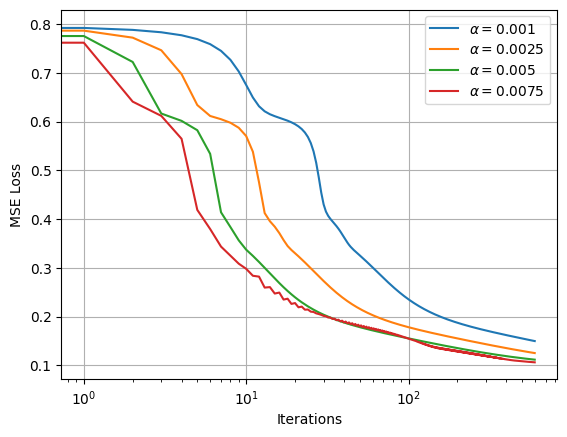

In [3]:
#Initiliazation of hyperparameters
LEARNING_RATE = 0.0025
NUM_iterations = 600
NUM_CLASSES = 3

alpha = [0.001, 0.0025, 0.005, 0.0075]

for i in range(4):
    W_trained, loss_history = train_linear_classifier(X_train, T_train, NUM_CLASSES, NUM_iterations, alpha[i])
    plt.plot(loss_history, label = rf"$\alpha = {alpha[i]}$")
plt.legend()
plt.xlabel("Iterations")
plt.xscale("log")
plt.grid(True)
plt.ylabel("MSE Loss")
plt.show()

class_names =  ['Iris setosa', 'Iris versicolor', 'Iris virginica']



In [4]:
def confusion_matrix(preds, targets):
    num_classes = 3
    cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for i in range(len(preds)):
        true = targets[i]
        pred = preds[i]
        cm[true,pred] += 1

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='d')
    plt.grid(False)
    plt.savefig("Figures/confusion_matrix.pdf", dpi=300, bbox_inches="tight")
    plt.show()


(c) Find the confusion matrix and the error rate for both the training and test sets.


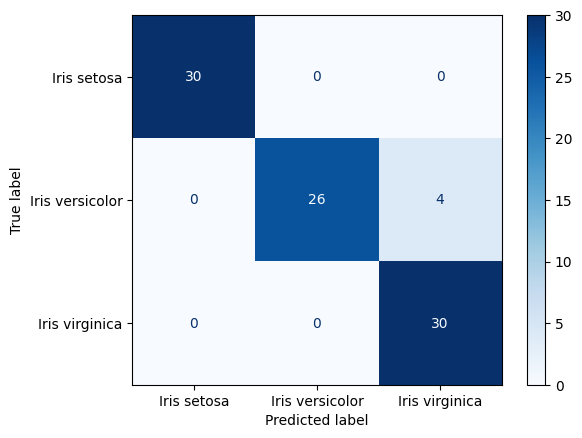

Error rate for training set is 0.044


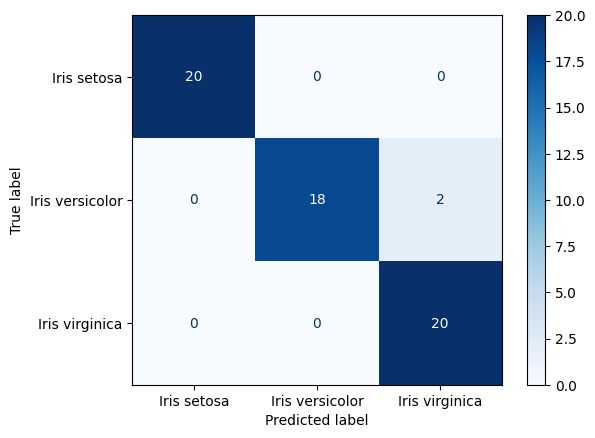

Error rate for test set is 0.033


In [5]:
#Confusion matrices and error rate for training set
W_trained, loss_history = train_linear_classifier(X_train, T_train, NUM_CLASSES, NUM_iterations, LEARNING_RATE)
train_preds, train_targets = get_predictions_and_targets(X_train, T_train, W_trained)
train_cm = confusion_matrix(train_preds, train_targets)
train_error_rate = get_error_rate(train_preds, train_targets)
print(f"Error rate for training set is {train_error_rate:.3f}")

#Confusion matrices and errror rate for test set
test_preds, test_targets = get_predictions_and_targets(X_test, T_test, W_trained)
test_cm = confusion_matrix(test_preds, test_targets)
test_error_rate = get_error_rate(test_preds, test_targets)
print(f"Error rate for test set is {test_error_rate:.3f}")

#Confusion matrices and errror rate for training set




(d) Now use the last 30 samples for training and the first 20 samples for testing.
Repeat the training and test phases for this case.


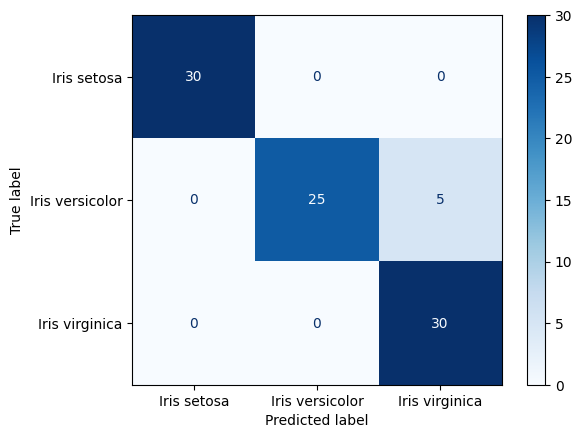

Error rate for training set is 0.056


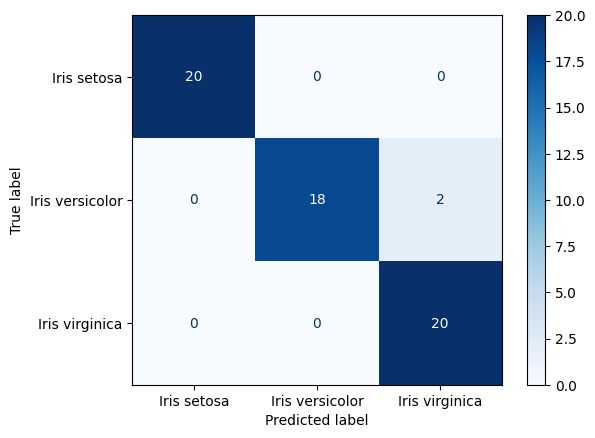

Error rate for test set is 0.033


In [6]:
X_test2 = np.concatenate([feature_data[0:20], feature_data[50:70], feature_data[100:120]])
T_test2= np.concatenate([labels[0:20], labels[50:70], labels[100:120]])

X_train2 = np.concatenate([feature_data[20:50], feature_data[70:100], feature_data[120:150]])
T_train2 = np.concatenate([labels[20:50], labels[70:100], labels[120:150]])


W_trained2, loss_history = train_linear_classifier(X_train2, T_train2, NUM_CLASSES, NUM_iterations, LEARNING_RATE)
train_preds2, train_targets2 = get_predictions_and_targets(X_train2, T_train2, W_trained2)

#Confusion matrices and errror rate for training set

train_cm2 = confusion_matrix(train_preds2, train_targets2)
train_error_rate2 = get_error_rate(train_preds2, train_targets2)
print(f"Error rate for training set is {train_error_rate2:.3f}")

#Confusion matrices and error rate for test set
test_preds2, test_targets2 = get_predictions_and_targets(X_test2, T_test2, W_trained2)
error_rate = get_error_rate(test_preds2, test_targets2)
test_cm2 = confusion_matrix(test_preds2, test_targets2)
print(f"Error rate for test set is {error_rate:.3f}")


(e) Compare the results for the two cases and comment.


2: (a) Produce histograms for each feature and class. Remove the feature that shows the
most overlap between the classes. Train and test a classifier with the remaining
three features.


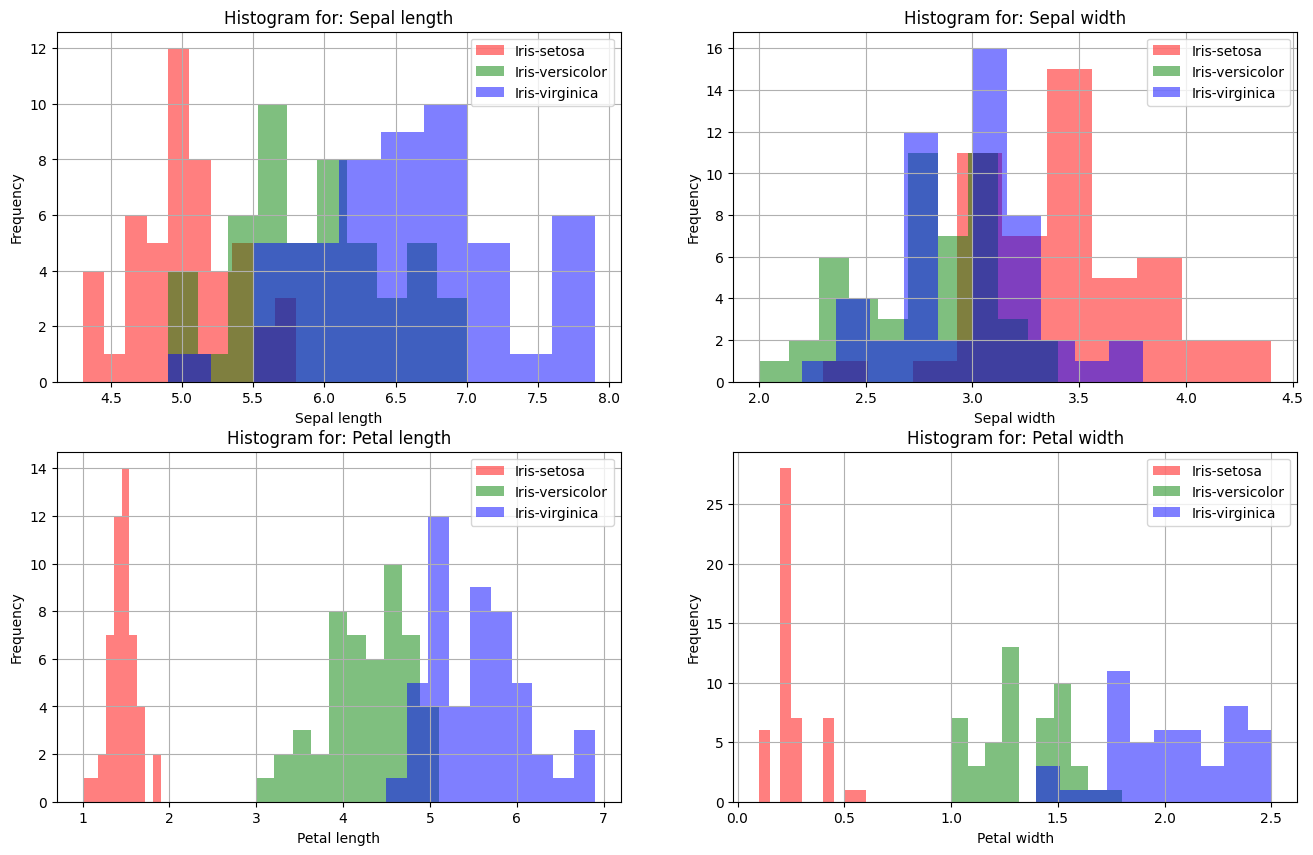

In [7]:
data = [line.strip().split(',') for line in data1 if line.strip() != '']

features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2x2 grid
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    for j, label in enumerate(class_labels):
        values = [float(row[i]) for row in data if row[-1] == label]
        ax.hist(values, bins=10, alpha=0.5, label=label, color=colors[j])
    ax.set_title(f'Histogram for: {features[i]}')
    ax.set_xlabel(features[i])
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

#plt.tight_layout()  # Adjust spacing to avoid overlap
plt.savefig("Figures/histograms.pdf", dpi=300, bbox_inches="tight")
plt.show()


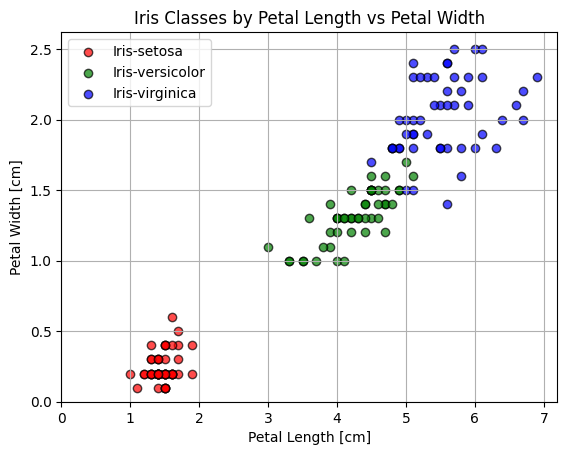

In [8]:
petal_length = feature_data[:, 2]
petal_width = feature_data[:, 3]

class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
class_colors = ['red', 'green', 'blue']

for i, class_name in enumerate(class_names):
    idx = [j for j, label in enumerate(targets) if label == class_name]
    plt.scatter(petal_length[idx], petal_width[idx],
                color=class_colors[i], label=class_name, alpha=0.7, edgecolor='k')

plt.xlabel("Petal Length [cm]")
plt.ylabel("Petal Width [cm]")
plt.title("Iris Classes by Petal Length vs Petal Width")
plt.xlim(left=0)  # Start x-axis from 0
plt.ylim(bottom=0)  # Start y-axis from 0
plt.legend()
plt.grid(True)
plt.savefig("Figures/petal_length_vs_petal_width.pdf", dpi=300, bbox_inches="tight")
plt.show()

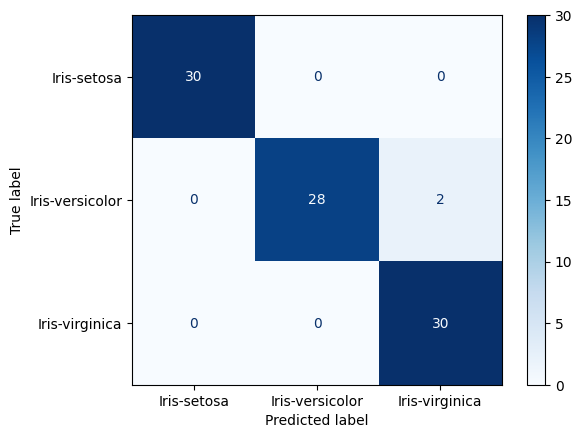

Error rate for training set without Sepal width is 0.022


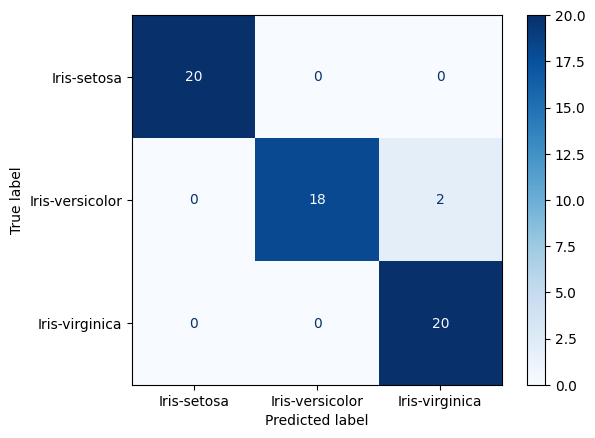

Error rate for training set is 0.033


In [9]:
#We see that the sepal width feature gives the most overlap between classes, so we choose to remove this class.
NUM_iterations = 1800


if feature_data.shape[1] == 5:
    X_reduced = np.delete(feature_data, 1, axis=1)

X_train_reduced = np.concatenate([X_reduced[0:30], X_reduced[50:80], X_reduced[100:130]])
X_test_reduced = np.concatenate([X_reduced[30:50], X_reduced[80:100], X_reduced[130:150]])

W_train_reduced, loss_history = train_linear_classifier(X_train_reduced, T_train, NUM_CLASSES, NUM_iterations, LEARNING_RATE)
train_preds_reduced, train_targets_reduced = get_predictions_and_targets(X_train_reduced, T_train, W_train_reduced)

reduced_train_cm = confusion_matrix(train_preds_reduced, train_targets_reduced)
red_train_error_rate = get_error_rate(train_preds_reduced, train_targets_reduced)
print(f"Error rate for training set without Sepal width is {red_train_error_rate:.3f}")

test_preds_reduced, test_targets_reduced = get_predictions_and_targets(X_test_reduced, T_test, W_train_reduced)
reduced_test_cm = confusion_matrix(test_preds_reduced, test_targets_reduced)
red_test_error_rate = get_error_rate(test_preds_reduced, test_targets_reduced)
print(f"Error rate for training set is {red_test_error_rate:.3f}")

(b) Repeat the experiment above with two and one features.


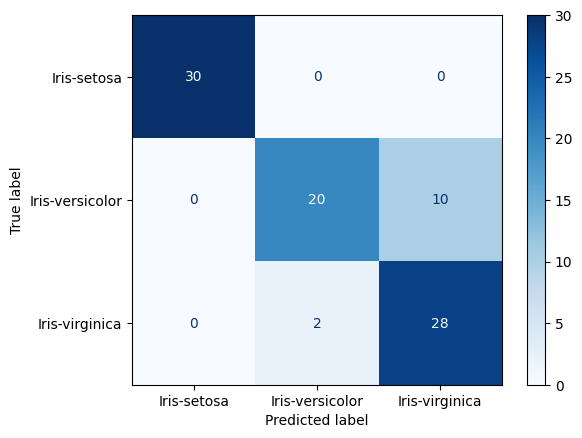

Error rate for training set without Sepal width and sepal length is 0.133


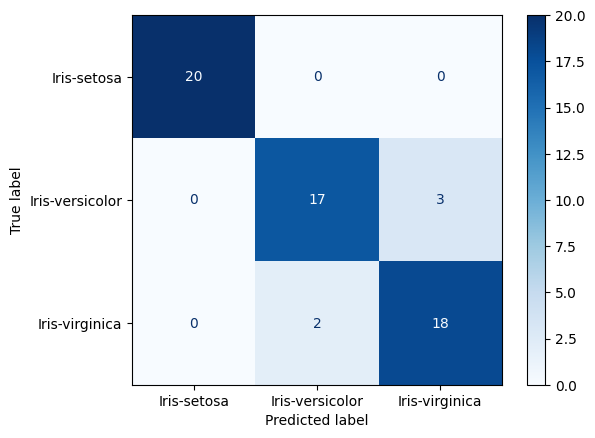

Error rate for test set without Sepal width and sepal length is 0.056


In [10]:
#Two features 

NUM_iterations = 3000

if X_reduced.shape[1] == 4:
    X_reduced2 = np.delete(X_reduced, 0, axis=1)

X_train_reduced2 = np.concatenate([X_reduced2[0:30], X_reduced2[50:80], X_reduced2[100:130]])
X_test_reduced2 = np.concatenate([X_reduced2[30:50], X_reduced2[80:100], X_reduced2[130:150]])

W_train_reduced2, loss_history = train_linear_classifier(X_train_reduced2, T_train, NUM_CLASSES, NUM_iterations, LEARNING_RATE)
train_preds_red2, train_target_red2 = get_predictions_and_targets(X_train_reduced2,T_train, W_train_reduced2)
reduced_train_cm2 = confusion_matrix(train_preds_red2, train_target_red2)
red_train_error_rate2 = get_error_rate(train_preds_red2, train_target_red2)
print(f"Error rate for training set without Sepal width and sepal length is {red_train_error_rate2:.3f}")

test_preds_reduced2, test_targets_reduced2 = get_predictions_and_targets(X_test_reduced2, T_test, W_train_reduced2)
reduced_test_cm2 = confusion_matrix(test_preds_reduced2, test_targets_reduced2)
red_test_error_rate2 = get_error_rate(train_preds2, train_targets2)
print(f"Error rate for test set without Sepal width and sepal length is {train_error_rate2:.3f}")

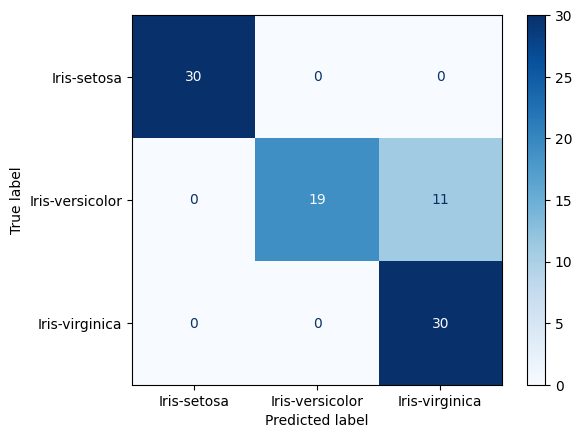

Error rate for training set without Sepal width is 0.122


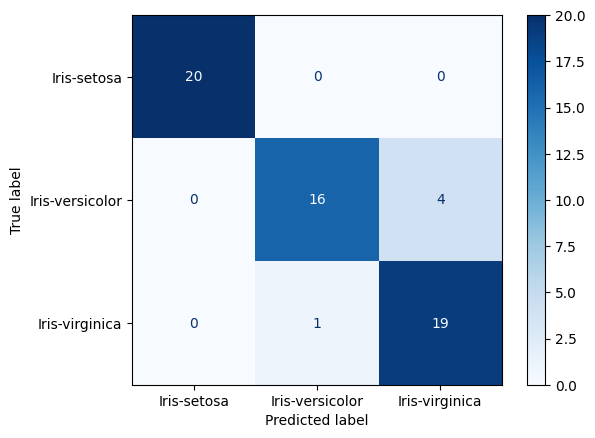

Error rate for training set is 0.083


In [11]:
#One feature
if X_reduced2.shape[1] == 3:
    X_reduced3 = np.delete(X_reduced2, 0, axis=1)


X_train_reduced3 = np.concatenate([X_reduced3[0:30], X_reduced3[50:80], X_reduced3[100:130]])

X_test_reduced3 = np.concatenate([X_reduced3[30:50], X_reduced3[80:100], X_reduced3[130:150]])

W_train_reduced3, loss_history = train_linear_classifier(X_train_reduced3, T_train, NUM_CLASSES, NUM_iterations, LEARNING_RATE)
train_preds_red3, train_target_red3 = get_predictions_and_targets(X_train_reduced3,T_train, W_train_reduced3)
reduced_train_cm3 = confusion_matrix(train_preds_red3, train_target_red3)
red_train_error_rate3 = get_error_rate(train_preds_red3, train_target_red3)
print(f"Error rate for training set without Sepal width is {red_train_error_rate3:.3f}")


test_preds_red3, test_target_red3 = get_predictions_and_targets(X_test_reduced3,T_test, W_train_reduced3)
test_preds_reduced3, test_targets_reduced3 = get_predictions_and_targets(X_test_reduced3, T_test, W_train_reduced3)
reduced_test_cm3 = confusion_matrix(test_preds_reduced3, test_targets_reduced3)
red_test_error_rate3 = get_error_rate(test_preds_reduced3, test_targets_reduced3)
print(f"Error rate for training set is {red_test_error_rate3:.3f}")

